# Dimensionality Reduction

As we have seen in many examples, most of the data we work with are multi-dimensional, meaning data points consist of a series of variables (or features).

Even in cases where we can still comfortably represent the data in tabular form, certain comparisons cannot be easily made because we have to deal with too many variables. The classic example is plotting data points in a 2D or at most a 3D scatter plot.

Data that include age, weight, and height can still be represented in 3D. But what if we add working hours, income, wealth, eye color, etc.?

The fact that we can no longer represent all variables simultaneously in such a plot might not seem like a dramatic problem at first. But behind this lies a much more general difficulty that high-dimensional data bring, also known as the **curse of dimensionality**. This refers to the drastic increase in volume when adding more dimensions.

**Example:**  
100 elevation markings along a 100m distance are sufficient to create a proper elevation profile. However, for a 100m x 100m area, 10021002 points would be needed, and so on.

We can also phrase this differently. A thousand well-distributed data points can give a good representation of a 2D or 3D space. In the example above, this means that I have people with high age, high weight, and great height, but also with low age but similar weight and height, etc. That is, I have data (here: people) that can describe most "corners" and parts of my space. But if those thousand data points now have 20 additional properties (income, shoe size, eye color, working hours, vacation days, ...), then I need many more data points to characterize this now 23-dimensional space.

We can also imagine that we want to find a person Y who is similar to person X. Maybe we find someone with a similar age, weight, and height. The income and shoe size may still fit. But the more dimensions our data have, the less likely it is that this will also apply to the other features. Therefore, the many dimensions of the data are not only a problem in graphical representation, but also in cluster analysis or for predictions.

A very commonly used technique in the field of data science is therefore **dimensionality reduction**. These are techniques aimed at retaining the most important information while simultaneously reducing the number of dimensions. It is, therefore, a form of data compression.


```{figure} ../images/fig_curse_of_dimensionality_01.png
:name: fig_dimensionality_reduction01

In many cases, we will work with data that has more than just 2 or 3 relevant features (or: dimensions). While age, weight, and height might all be of interest when we analyze a dataset on people, it is not very likely that this will be sufficient to reveal very interesting patterns. We can easily plot 2 or 3 features (see (a)). But what do we do if we want to add additional features, maybe even *many* additional features?
The *curse of dimensionality* can be understood by imagining that we have to fully explore a feature space. 2D and 3D are relatively straightforward, but when we have to cover a much higher dimensional space we simply need far too many datapoints to *cover* this space reasonably well (see (b)).
```

### Feature Selection

A variant of dimensionality reduction is **feature selection**. The goal here is to identify features of the least importance for our specific task and remove them from the data. Common methods include:

- Features that are highly correlated (*high correlation filter*).
- Features that show little variation (*low variance filter*).
- Features that are not very reliable (e.g., *missing value threshold*).
- Features that a machine learning model deems most important (e.g., a Random Forest model).

This type of feature selection has the advantage that the steps are often easy to understand. No abstract features are created (as in PCA), and the results are easily reproducible.

However, in practice, especially with higher-dimensional data, the disadvantages often outweigh these benefits. For one, such feature selection usually only allows for modest data compression, meaning that even with large datasets, many dimensions remain. Additionally, it's often challenging to decide what is important and what is not. This step requires extensive knowledge about the individual features and the questions posed.

### Feature Projection

An entirely different approach from feature selection is pursued with special algorithms for dimensionality reduction. Typically, the number of resulting dimensions can be arbitrarily defined. In summary, this is about **feature projection**, i.e., the transformation of data from a high-dimensional space into a low-dimensional space. These transformations can be linear (e.g., PCA) or non-linear (e.g., Kernel-PCA).

## PCA (Principal Component Analysis)

Principal Component Analysis (PCA) is a fundamental technique in dimensionality reduction. It's particularly useful for reducing the complexity of data, improving the interpretability of datasets, and in some cases, enhancing the performance of machine learning algorithms. Let's delve into the details of how PCA works.

### Concept

PCA involves the following key steps:

1. **Standardization**: PCA is sensitive to the scale of the features, so it's common to standardize the data before applying PCA.
2. **Covariance Matrix Computation**: This matrix represents the covariance (a measure of how much two variables change together) between each pair of features in the data.
3. **Eigenvalue Decomposition**: This process involves finding the eigenvalues and eigenvectors of the covariance matrix. These eigenvectors determine the directions of the new feature space, and the eigenvalues determine their magnitude (or the variance carried by each principal component).
4. **Selection of Principal Components**: Principal components are the new set of variables that are obtained from the initial set of variables. They are selected based on the eigenvalues, as the eigenvectors with the highest eigenvalues carry the most information about the distribution of the data.

### Mathematical Formulation

1. **Standardization**: Each feature XiXi is scaled to have a mean of 0 and a standard deviation of 1.

2. **Covariance Matrix ($\Sigma$) Calculation**:

   $$
   \Sigma  = \frac{1}{n-1} \left( X - \bar{X} \right)^T \left( X - \bar{X} \right)
   $$

   where $X$ is the feature matrix, and $\bar{X}$ is the mean vector of $X$.

4. **Eigenvalue Decomposition**:

   Solve $\Sigma v=\lambda v$, where $\lambda$ are eigenvalues, and $v$ are eigenvectors.

5. **Selecting Principal Components**: The eigenvectors with the highest eigenvalues are chosen as the principal components.

### Practical Example with Python

We'll create a 2D dataset and apply PCA to reduce it to 1D. First, we'll generate a synthetic dataset.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Generating Synthetic Data

Let's create a dataset of 2 features with a clear linear relationship.

In [45]:
# Generating a synthetic 2D dataset
np.random.seed(0)
X = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.8], [0.8, 1]], size=200)

# Standardizing the dataset
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Applying PCA

We will then standardize this data and apply PCA to reduce its dimensionality.
To inspect the results, we will use a simple scatter plot visualization.

In [46]:
# Applying PCA to reduce dimensionality from 2D to 1D
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

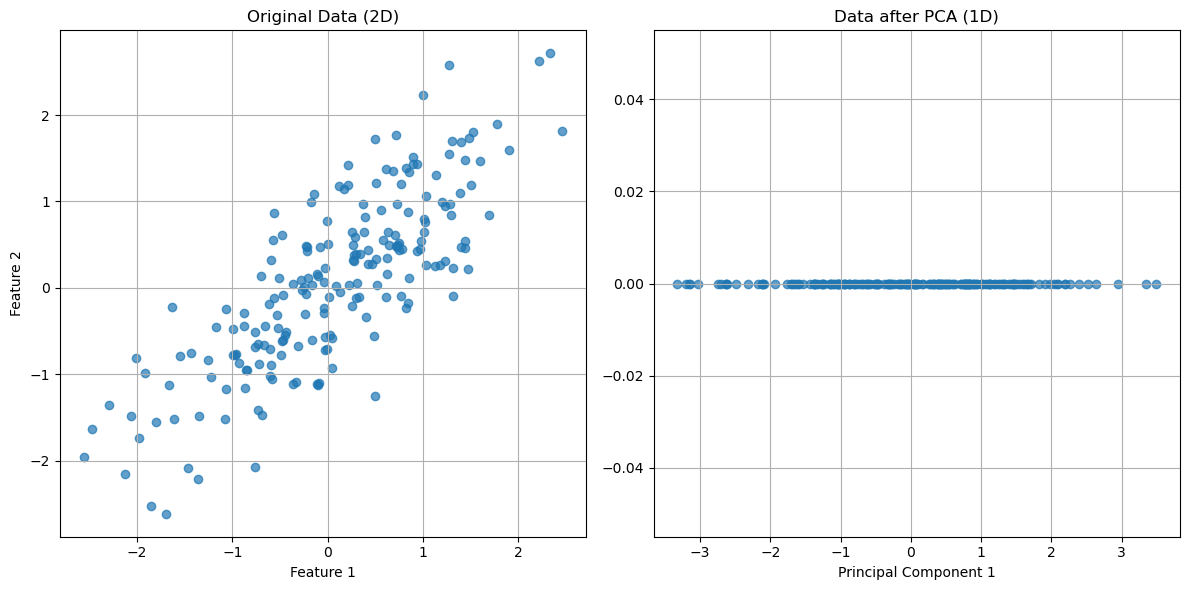

In [48]:
# Plotting the original data and the principal component
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Original Data (before PCA)
ax1.scatter(X[:, 0], X[:, 1], alpha=0.7)
ax1.set_title("Original Data (2D)")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.grid(True)

# Data after PCA transformation
ax2.scatter(X_pca[:, 0], np.zeros(len(X_pca)), alpha=0.7)
ax2.set_title("Data after PCA (1D)")
ax2.set_xlabel("Principal Component 1")
ax2.grid(True)

plt.tight_layout()
plt.show()

In the figures above, we can see a clear demonstration of PCA in action:

1. Original Data (2D): The left plot shows our synthetic 2D dataset. The dataset exhibits a linear relationship between the two features, making it a good candidate for PCA.

2. Data after PCA (1D): The right plot shows the data after applying PCA and reducing its dimensionality to 1D. This plot represents the projection of the original data onto the first principal component. This principal component is a line that best represents the variance in the dataset.

By transforming the data onto this principal component, we've effectively reduced its dimensionality while retaining the most important variance in the data. PCA has simplified the dataset, making it easier to analyze and visualize, and potentially improving the efficiency and performance of subsequent data processing or machine learning algorithms. ​
​

## Use Case: Marketing Analysis (with PCA)
Let's now move to a more realistic use case to show what dimensionality reduction method can be used for.
In the following part we will look at data from a marketing campaign, or more in general data from an online store ([link to the dataset](https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset)). In a first step, we will import and inspect the data. Then, we will clean and process the data a little before we can actually apply `PCA` to reduce the data to two dimensions.

### Data import and inspection

In [49]:
path_data = "../datasets/"
filename = "superstore_data.csv"

data = pd.read_csv(os.path.join(path_data, filename))
data = data.set_index("Id")
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Id,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,37,1,7,3,7,5,1,0
10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,30,1,3,2,5,2,0,0
1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,0,1,1,0,2,7,0,0
5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,11,0,34,2,3,1,2,7,1,0


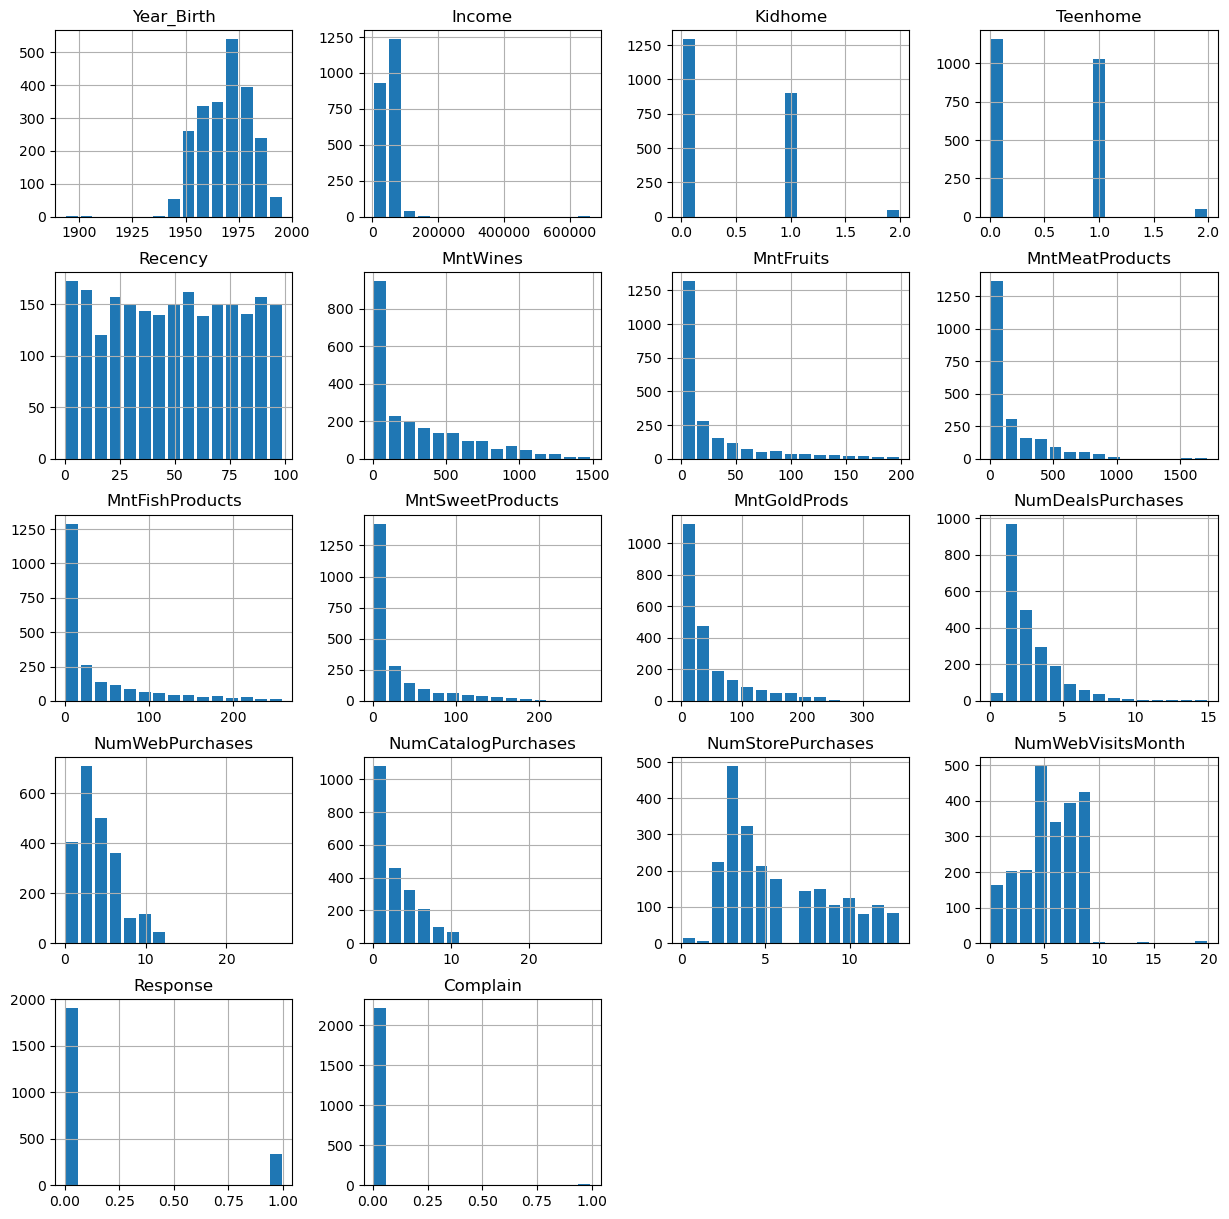

In [11]:
data.hist(figsize=(15, 15), bins=15, rwidth=0.8)
plt.show()

In [12]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 1826 to 4070
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   int

### Data cleaning
Some values appear weird, for instance in the column `Year_Birth`. In addition, we might want to remove some "outliers", i.e., rare cases in which we might not be so interested. Here, this could be the few people with enormously high incomes (independent of whether those values are true or not...).

In [14]:
mask = (data["Income"] < 150000) & (data["Year_Birth"] >= 1925)
data = data[mask]
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Id,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,37,1,7,3,7,5,1,0
10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,30,1,3,2,5,2,0,0
1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,0,1,1,0,2,7,0,0
5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,11,0,34,2,3,1,2,7,1,0


Here, we also use some **feature manipulation** to change features into a easier-to-interpret form (age) or to compute additional quantities that we expect to be relevant.

In [31]:
#Age of customer today 
data["Age"] = 2020 - data["Year_Birth"]  # which year to start?!

#Total spendings on various items
data["Spent"] = data.iloc[:, 8:14].sum(axis=1)

#Dropping some of the redundant features
to_drop = ["Year_Birth"]
data = data.drop(to_drop, axis=1)

### Data processing

Dimensionality reduction techniques such as PCA require numerical data, which is not very suprising given how the method works (see above).
The most common pitfall, however, is that **PCA is extremely sensitive to the scaling of the data**. It looks for the features with the largest variance, so imagine that one feature is income which can have values of many 10,000s and another feature is age which will usually stay below 100. Then PCA will virtually ignore the feature "age" in comparison to the much higher values of the feature "income". To circumvent this undesired effect, the data needs to be **scaled so that all features show comparable ranges**.

Here, we will use the Scikit-Learn `StandardScaler` for this task.

In [32]:
from sklearn.preprocessing import StandardScaler

# Creating a copy of data (with only numerical values)
data_numerical = data.copy().select_dtypes(include='number')

# Creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_remove = ["Complain", "Response"]
data_numerical = data_numerical.drop(cols_remove, axis=1)

# Scaling
scaler = StandardScaler()
scaler.fit(data_numerical)
data_scaled = pd.DataFrame(scaler.transform(data_numerical),
                           columns= data_numerical.columns )

In [33]:
data_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent
0,1.603840,-0.823405,-0.930767,-1.694318,-0.347240,1.950872,0.981413,1.336263,3.936458,3.362873,-0.699147,-0.036788,0.484147,0.054432,-1.797341,-0.093624,0.969477
1,0.264092,-0.823405,-0.930767,-1.694318,0.467775,-0.538100,-0.465299,-0.561124,-0.659718,-0.136437,-0.699147,1.059382,0.126750,0.362973,-0.139645,0.675400,-0.049576
2,0.755487,-0.823405,0.906602,-1.694318,-0.510242,-0.387253,-0.488263,-0.415171,-0.611081,-0.271770,-0.699147,-0.402177,-0.230646,-0.254109,-1.382917,0.931742,-0.591519
3,-0.924655,1.038757,0.906602,-1.694318,-0.877740,-0.663806,-0.754642,-0.688833,-0.659718,-0.851766,-0.699147,-1.132957,-0.945440,-1.179732,0.689203,0.162718,-0.990496
4,-1.455841,1.038757,-0.930767,-1.694318,-0.889595,-0.261548,-0.649009,-0.488148,-0.659718,-0.194437,-0.168834,-0.402177,-0.588043,-1.179732,0.689203,-1.717119,-0.857504


Finally, we can compute the PCA components for our data:

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(data_scaled)
X_pca = pca.transform(data_scaled)
X_pca.shape

(2205, 2)

As we see, the data (2205 datapoints) is now reduced to two dimensions. We will use these two dimensions to plot all datapoints using a scatter plot.

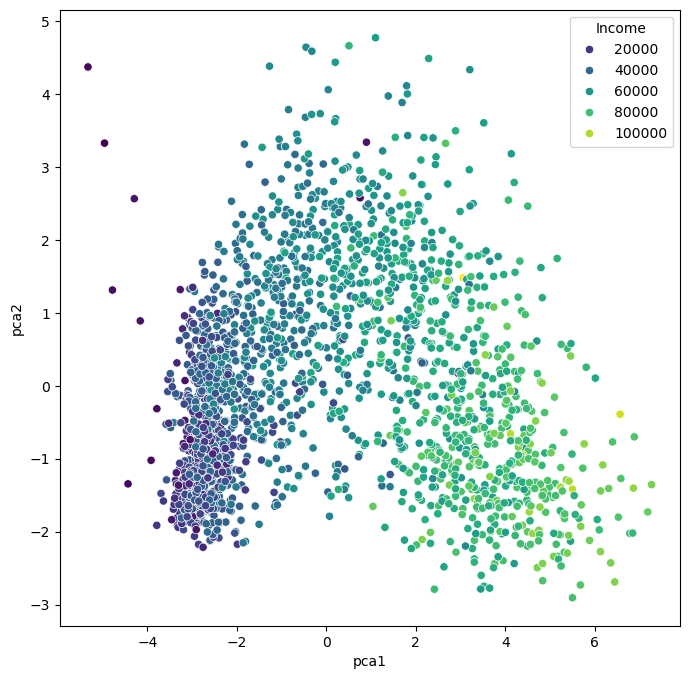

In [35]:
import seaborn as sb

data_plot = data.copy()
data_plot[["pca1", "pca2"]] = X_pca

fig, ax = plt.subplots(figsize=(8, 8))
sb.scatterplot(data=data_plot,
                x="pca1",
                y="pca2",
                hue="Income",
                palette="viridis")
plt.show()

We can, obviously, freely choose which feature we want to use for coloring. It is also possible to add another feature for scaling the size of the dots.

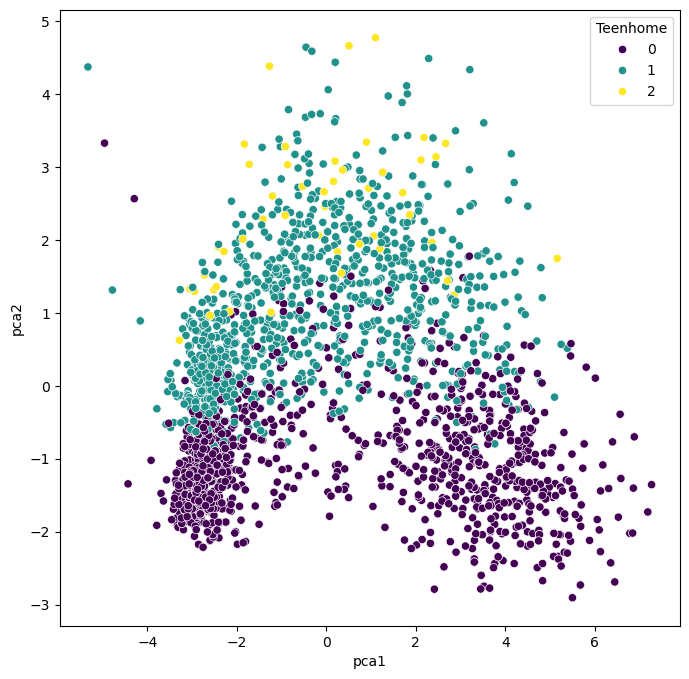

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
sb.scatterplot(data=data_plot,
                x="pca1",
                y="pca2",
                hue="Teenhome",
                palette="viridis")
plt.show()

## Non-linear Dimensionality Reduction Techniques

The PCA plots above show that the dimensionality reduction worked to quite some extend. How do we know this? Well, first we see that the points are not randomly distributed without any visible correlation to its features. We see that high and low income people are placed in different areas of the plot, and the same is true for other features as well.

Still, in many cases, PCA might not provide the best possible results. Mostly because of its main limitation: being a linear method. This can be seen particularly well in the plot which uses the income for the dot color. This clearly shows a clear overall direction of low to high incomes.

**Why is this a problem?**  
A lot of data we care about is highly non-linear. And linear methods are then often not able to map the data onto fewer dimensions in an appropriate or sufficiently delicate & complex manner. In the present case, we might get the impression that the plot -while it looks nice- may not tell us a lot of new things about our data.

In such cases, it is recommended to also try non-linear approaches. In recent years, the most popular go-to choices in data science are **t-SNE** and **UMAP**, but well-established methods also include **kernel-PCA** and many others.

In the next part, those tools will briefly be introduced before we finally apply t-SNE to our marketing dataset.

### PCA on generated 2D test data
We will now test a few methods with strongly non-linear generated 2D data to better understand what the above mentioned limitation means.

In [2]:
# Generate fake data
np.random.seed(0)
r = np.concatenate((np.random.normal(1, 0.1, 200),
                    np.random.normal(0, 0.3, 100)))
phi = 100 * np.random.random(300)
x = r * np.cos(phi)
y = r * np.sin(phi)

labels = np.array(200*["crimson"] + 100*["teal"])
gen_data = np.stack((x/np.max(x), y/np.max(y)))

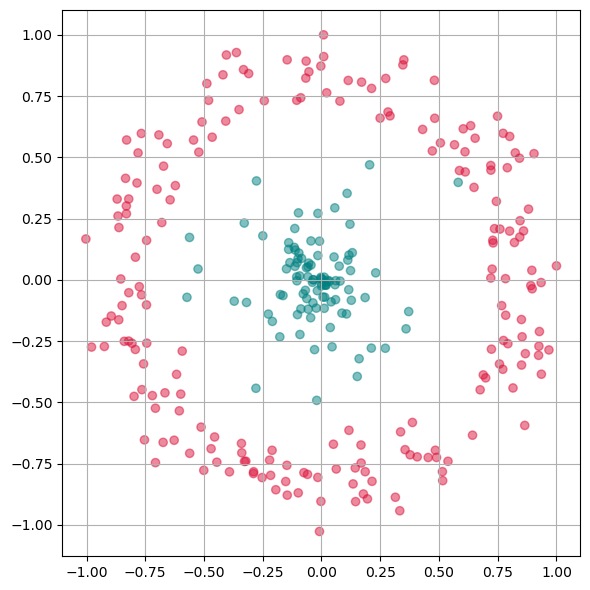

In [4]:
fig, ax = plt.subplots(figsize=(6 ,6))
ax.scatter(gen_data[0], gen_data[1], alpha=0.5, c=labels)
plt.grid(True)
plt.tight_layout()
plt.show()

First we will apply **PCA** to reduce this data to one dimension.

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(gen_data.T)

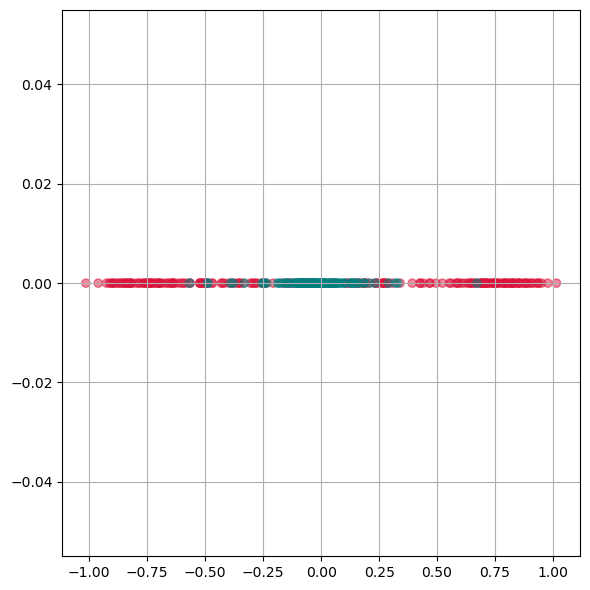

In [6]:
fig, ax = plt.subplots(figsize=(6 ,6))
ax.scatter(X_pca, np.zeros(300), alpha=0.5, c=labels)
plt.grid(True)
plt.tight_layout()
plt.show()

As we see from this plot, **PCA** is not able to separate the two different colors. This means it doesn not find a good lower dimensional representation of this particular dataset.

### Kernel-PCA

Kernel-PCA processes data in a higher-dimensional space, a technique often referred to as the "kernel trick." A commonly used kernel function in this context is the Radial Basis Function (RBF).

Initially, this approach might seem counterintuitive. The objective of dimensionality reduction is to simplify data, so why first move it into a higher-dimensional space? The purpose of this step is to overcome the limitations of linear transformations, such as the principal axis transformation or rotation found in PCA. By suitably projecting data into a higher-dimensional space, linear techniques can sometimes achieve more effective transformations, offering a more nuanced understanding of complex data sets.

**Advantages:**

- A non-linear technique, capable of handling non-linear data.
- Still relatively fast compared to other non-linear methods.

**Disadvantages:**

- Requires optimization of additional parameters, such as the choice of kernel function and its parameters.
- These parameters can significantly impact the results, making the process sensitive to these settings.

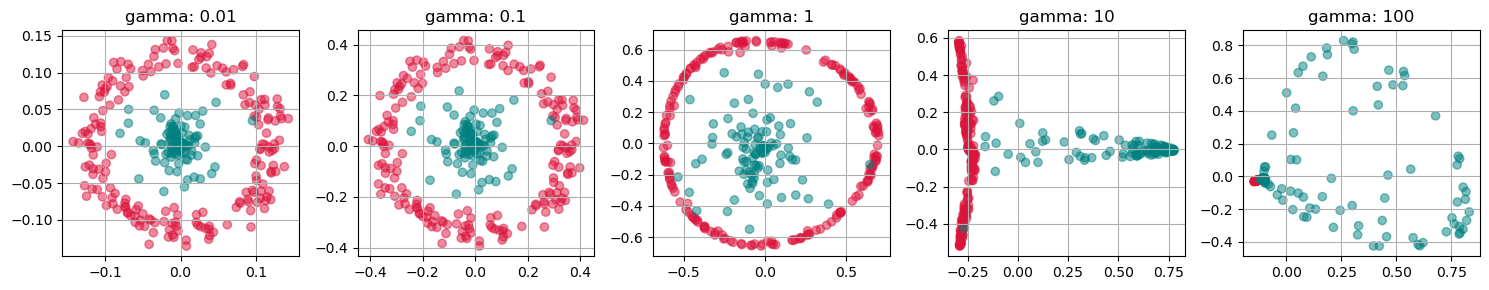

In [9]:
from sklearn.decomposition import KernelPCA

fig, axs = plt.subplots(1, 5, figsize=(15 ,3))

for i, gamma in enumerate([0.01, 0.1, 1, 10, 100]):
    kpca = KernelPCA(n_components=2, kernel="rbf",
                     gamma=gamma, random_state=42,
                     fit_inverse_transform=True, alpha=0.1)

    X_kpca = kpca.fit_transform(gen_data.T)

    axs[i].scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.5, c=labels)
    axs[i].set_title(f"gamma: {gamma}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

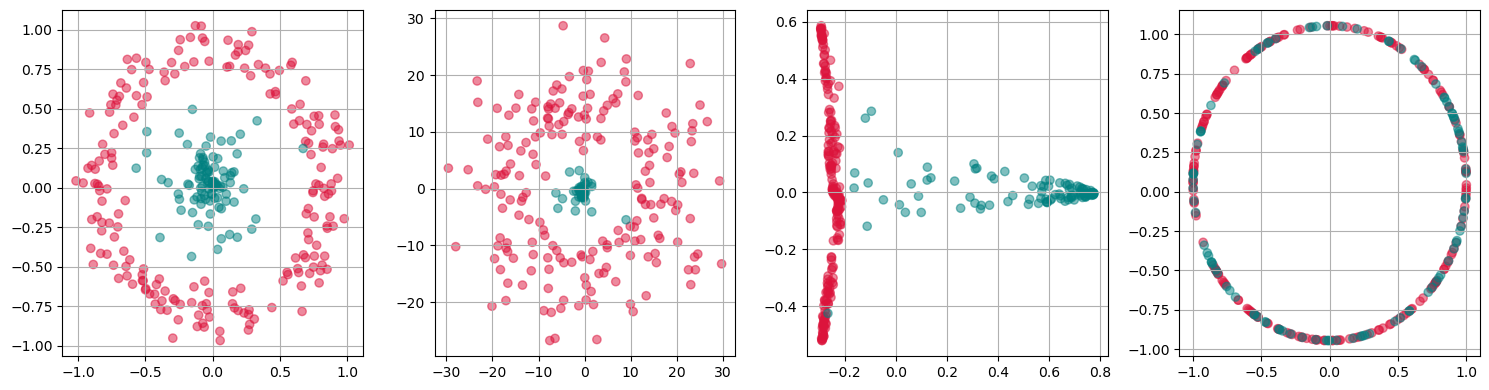

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(15 ,4))

for i, kernel in enumerate(["linear", "poly", "rbf", "cosine"]):
    kpca = KernelPCA(n_components=2, kernel=kernel,
                     gamma=10, random_state=42,
                     fit_inverse_transform=True, alpha=0.1)

    X_kpca = kpca.fit_transform(gen_data.T)

    axs[i].scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.5, c=labels)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

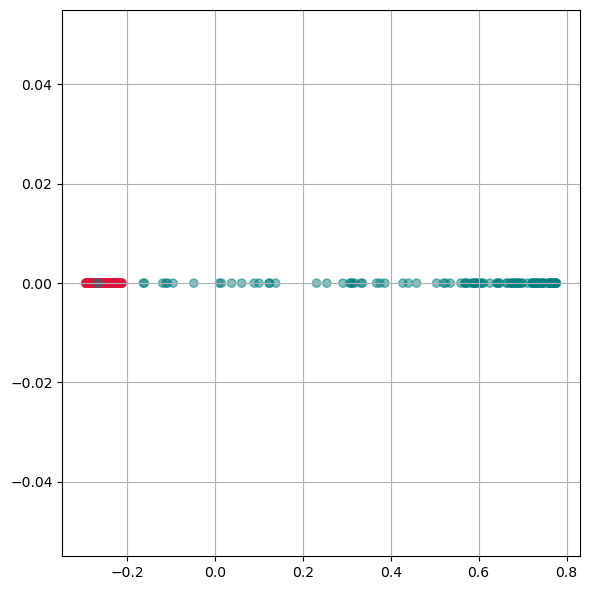

In [13]:
kpca = KernelPCA(n_components=1, kernel='rbf', 
                 gamma=10, random_state=42)
X_kpca = kpca.fit_transform(gen_data.T)

fig, ax = plt.subplots(figsize=(6 ,6))
ax.scatter(X_kpca, np.zeros(300), alpha=0.5, c=labels)
ax.grid(True)
plt.tight_layout()
plt.show()

Here we see, that kernel-PCA is capable of keeping the two colors separate even after reducing all points to one dimension.

### t-SNE

t-SNE is another non-linear technique that can manage non-linear data {cite}`maaten2008tsne`. Over the last 10-15 years it quickly became one of the most commonly used dimensionality reduction techniques in data science. It is known for producing high-quality results but is slower than PCA. This slower performance is due to its complexity and the additional parameters that need optimization.

**Advantages:**

- Non-linear, suitable for complex data structures.
- Produces high-quality, detailed results.

**Disadvantages:**

- Slower, especially for larger datasets.
- Requires careful tuning of parameters.

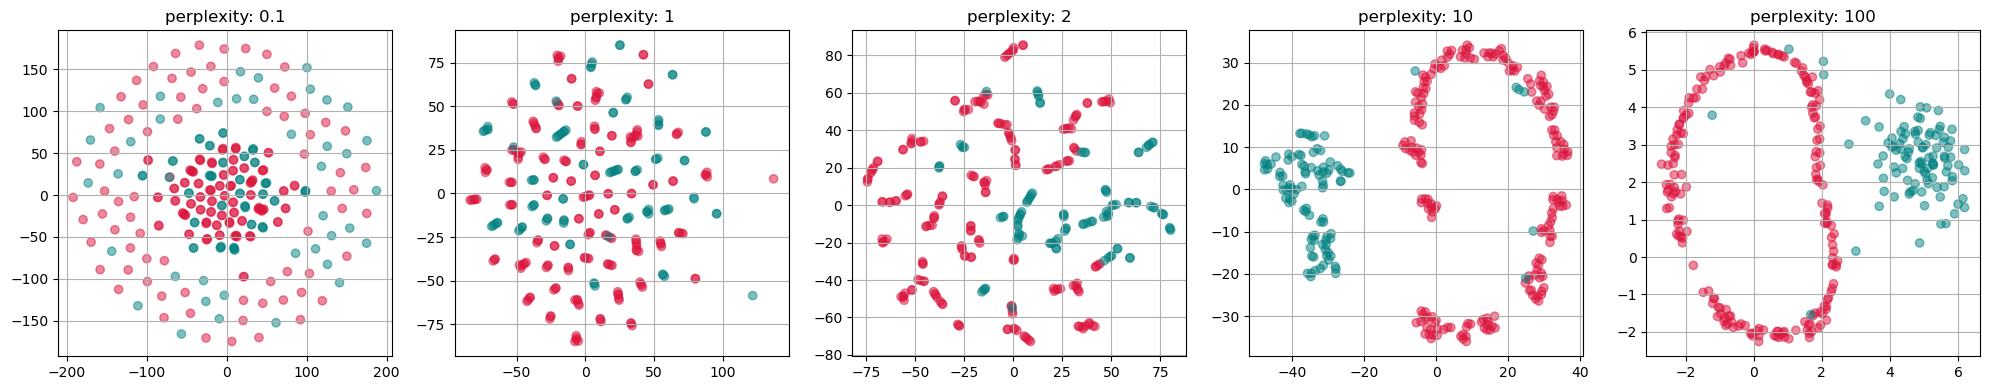

In [15]:
from sklearn.manifold import TSNE

perplexities = [0.1, 1, 2, 10, 100]
fig, axs = plt.subplots(1, len(perplexities), figsize=(4*len(perplexities) ,4))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, init="random")
    X_tsne = tsne.fit_transform(gen_data.T)

    axs[i].scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, c=labels)
    axs[i].set_title(f"perplexity: {perplexity}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

### UMAP (Uniform Manifold Approximation and Projection)

UMAP is a relatively recent addition to dimensionality reduction techniques {cite}`mcinnes2018umap`. It is particularly effective for large datasets and is known for preserving more of the global data structure compared to methods like t-SNE.

**Advantages:**

- Efficient with large datasets.
- Preserves more global structure, providing a broader view of data relationships.
- Flexible and can be used in a variety of contexts.

**Disadvantages:**

- Like other non-linear methods, it requires parameter tuning.
- The results can be sensitive to these parameter choices.

### Comparison and Application

Each of these techniques has unique strengths and weaknesses, making them suitable for different types of data and objectives. Kernel-PCA is a versatile tool for moderately complex data, while t-SNE and UMAP excel in revealing intricate structures in high-dimensional data.

The choice of technique depends on the specific requirements of the analysis, such as the need for speed (favoring Kernel-PCA), detail (favoring t-SNE), or a balance of structure preservation and speed (favoring UMAP). Understanding the nature of the dataset and the goals of the analysis is key to selecting the most appropriate dimensionality reduction method.

## Use case: Marketing Analysis (t-SNE)
Let us now continue with our use case of the marketing dataset where PCA worked to some extend, but maybe not as well as we wanted. Here, we now use t-SNE instead to reduce the datapoints to only two dimensions which makes it possible to visualize all data points in a 2D scatter plot.

In [37]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=50,
           random_state=0)
X_tsne = tsne.fit_transform(data_scaled)

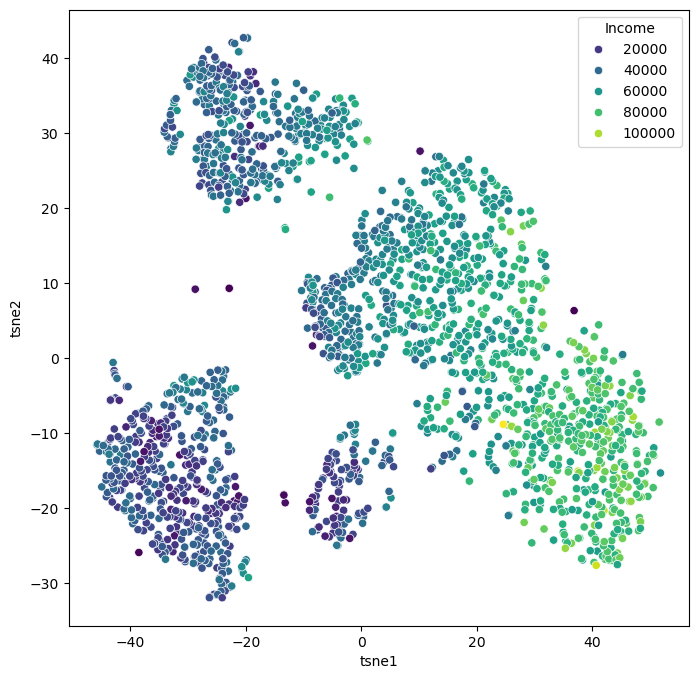

In [38]:
data_plot[["tsne1", "tsne2"]] = X_tsne


fig, ax = plt.subplots(figsize=(8, 8))
sb.scatterplot(data=data_plot,
                x="tsne1",
                y="tsne2",
                hue="Income",
                palette="viridis")
plt.show()

We can of course, also plot several features in parallel by combining multiple plots.

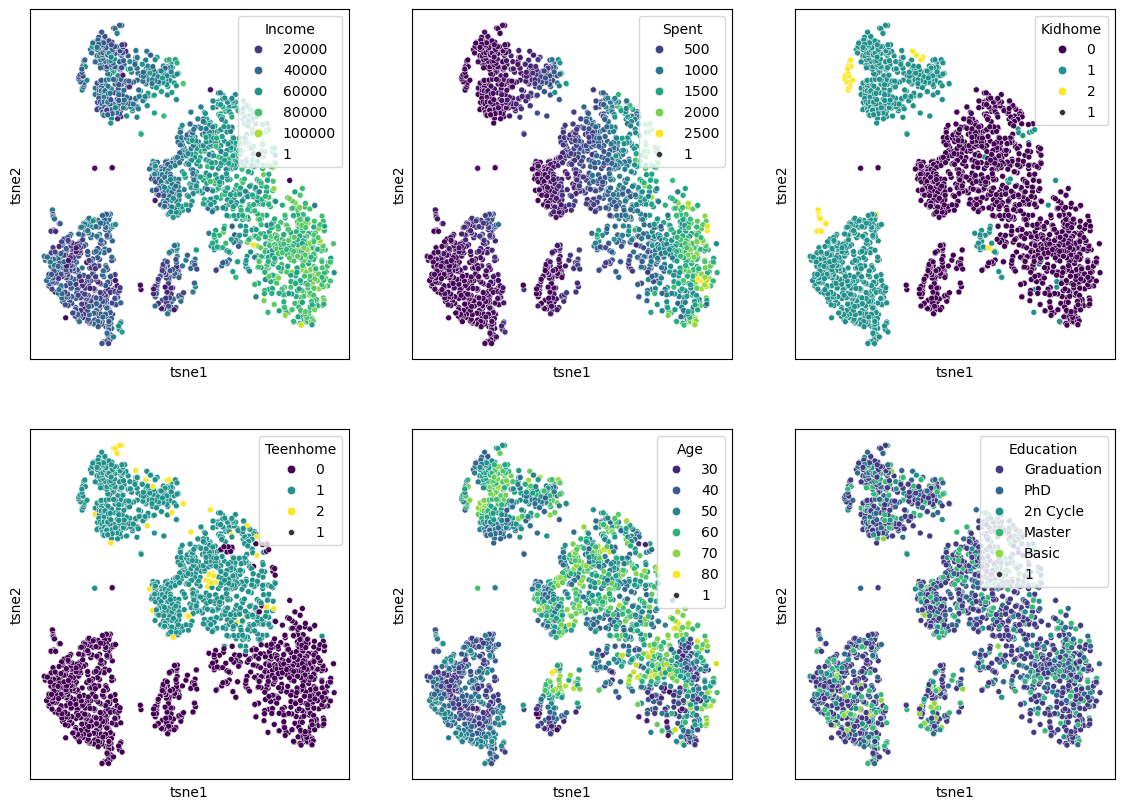

In [40]:
features = ["Income", "Spent", "Kidhome", "Teenhome", "Age", "Education"]

fig, axes = plt.subplots(2, 3, figsize=(14, 10))

for i, ax in enumerate(axes.reshape(-1)):
    sb.scatterplot(data=data_plot,
                   x="tsne1",
                   y="tsne2",
                   hue=features[i],
                   palette="viridis",
                   ax=ax)
    
    ax.set_xticks(ticks=[])
    ax.set_yticks(ticks=[])
plt.show()

## Conclusions
It can be hard to judge whether one particular dimensionality reduction result is better or worse than another. What should have become clear though, is that the non-linear techniques are capable of revealing more complex relationships and patterns. In the case of the marketing data, the t-SNE result reveals a much clearer structure suggesting different customer groups.

**Why not always use t-SNE or UMAP then?**  
While both techniques are very popular and generally work quite well, they come with some severe disadvantages. First, all the non-linear methods require additional parameters that need adjusting. This automatically brings a larger workload for us as data scientists, but it also commonly raises questions on how to best select the "right" parameters. Do we choose the pretties plot, or a random one, or should we define quantitative criteria ...

In practice, people will often simply play around with the key parameters and pick the result that fits their story best. While there is a lot of research on how to optimize and evaluate such results, this remains a complex -and often inconclusive- matter.

Finally, performance is also a key factor!  
If it comes to a fast reduction of large sets of high-dimensional data, PCA often still is the go-to technique. Implementations of slower tools such as t-NSE are hence often combined with PCA or similar methods.